In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.utils import shuffle
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from keras.backend import batch_normalization
from tensorflow.keras.callbacks import ModelCheckpoint

In [13]:
x_train=np.loadtxt('drive/MyDrive/DEPI/lab3/input.csv',delimiter=',')
y_train=np.loadtxt('drive/MyDrive/DEPI/lab3/labels.csv',delimiter=',')
x_test=np.loadtxt('drive/MyDrive/DEPI/lab3/input_test.csv',delimiter=',')
y_test=np.loadtxt('drive/MyDrive/DEPI/lab3/labels_test.csv',delimiter=',')

In [4]:
print('shape of x_train' ,x_train.shape)
print('shape of y_train' ,y_train.shape)
print('shape of x_test' ,x_test.shape)
print('shape of y_test' ,y_test.shape)

shape of x_train (2000, 30000)
shape of y_train (2000,)
shape of x_test (400, 30000)
shape of y_test (400,)


In [14]:
x_train = x_train.reshape(len(x_train), 100, 100, 3) / 255.0
y_train = y_train.reshape(len(y_train), 1)
x_test = x_test.reshape(len(x_test), 100, 100, 3) / 255.0
y_test = y_test.reshape(len(y_test), 1)

In [15]:
from sklearn.utils import shuffle



x_train, y_train = shuffle(x_train, y_train, random_state=100)

datagen = ImageDataGenerator(
    validation_split=0.2,
    rotation_range=40,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = datagen.flow(
    x_train, y_train,
    batch_size=16,
    subset='training'
)

validation_generator = datagen.flow(
    x_train, y_train,
    batch_size=16,
    subset='validation'
)

In [7]:
print('shape of x_train' ,x_train.shape)
print('shape of y_train' ,y_train.shape)
print('shape of x_test' ,x_test.shape)
print('shape of y_test' ,y_test.shape)

shape of x_train (2000, 100, 100, 3)
shape of y_train (2000, 1)
shape of x_test (400, 100, 100, 3)
shape of y_test (400, 1)


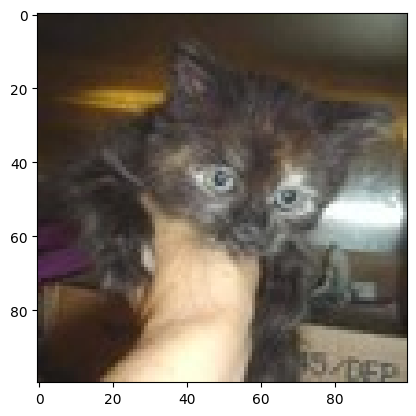

In [8]:
idx = random.randint(0, len(x_train) - 1)
plt.imshow(x_train[idx])
plt.show()


In [25]:
# model = Sequential()
# model.add(Conv2D(128, (3,3), activation='relu'))
# model.add(MaxPooling2D(2,2))
# model.add(Conv2D(256, (3,3), activation='relu'))
# model.add(MaxPooling2D(2,2))
# model.add(Conv2D(128, (3,3), activation='relu'))
# model.add(MaxPooling2D(2,2))
# model.add(Conv2D(256, (3,3), activation='relu'))
# model.add(MaxPooling2D(2,2))
# model.add(Flatten())
# model.add(Dense(128, activation='relu'))
# model.add(Dense(1, activation='sigmoid'))

In [16]:
model = Sequential()
model.add(Conv2D(64, (3,3), activation='relu', input_shape=(100,100,3)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(256, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [17]:
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history=model.fit(train_generator, epochs=30, validation_data=validation_generator,callbacks=[mc])

Epoch 1/30
100/100 [==============================] - ETA: 0s - loss: 0.7070 - accuracy: 0.4931
Epoch 1: val_accuracy improved from -inf to 0.55000, saving model to best_model.h5
100/100 [==============================] - 95s 930ms/step - loss: 0.7070 - accuracy: 0.4931 - val_loss: 0.6925 - val_accuracy: 0.5500
Epoch 2/30
100/100 [==============================] - ETA: 0s - loss: 0.6952 - accuracy: 0.5081
Epoch 2: val_accuracy did not improve from 0.55000
100/100 [==============================] - 93s 932ms/step - loss: 0.6952 - accuracy: 0.5081 - val_loss: 0.6931 - val_accuracy: 0.5100
Epoch 3/30
100/100 [==============================] - ETA: 0s - loss: 0.6931 - accuracy: 0.5013
Epoch 3: val_accuracy did not improve from 0.55000
100/100 [==============================] - 91s 906ms/step - loss: 0.6931 - accuracy: 0.5013 - val_loss: 0.6888 - val_accuracy: 0.5425
Epoch 4/30
100/100 [==============================] - ETA: 0s - loss: 0.6900 - accuracy: 0.5163
Epoch 4: val_accuracy improve

In [20]:
model1 = Sequential()
model1.add(Conv2D(128, (3,3), activation='relu', input_shape=(100,100,3)))
model1.add(MaxPooling2D(2,2))
model1.add(Conv2D(128, (3,3), activation='relu'))
model1.add(MaxPooling2D(2,2))
model1.add(Conv2D(256, (3,3), activation='relu'))
model1.add(MaxPooling2D(2,2))
model1.add(Flatten())
model1.add(Dense(512, activation='relu'))
model1.add(Dense(1, activation='sigmoid'))

In [21]:
mc = ModelCheckpoint('best_model1.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history1=model1.fit(train_generator, epochs=30, validation_data=validation_generator,callbacks=[mc])

Epoch 1/30
100/100 [==============================] - ETA: 0s - loss: 0.7161 - accuracy: 0.5094
Epoch 1: val_accuracy improved from -inf to 0.51750, saving model to best_model1.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


100/100 [==============================] - 152s 1s/step - loss: 0.7161 - accuracy: 0.5094 - val_loss: 0.6915 - val_accuracy: 0.5175
Epoch 2/30
100/100 [==============================] - ETA: 0s - loss: 0.6901 - accuracy: 0.5419
Epoch 2: val_accuracy improved from 0.51750 to 0.55500, saving model to best_model1.h5
100/100 [==============================] - 161s 2s/step - loss: 0.6901 - accuracy: 0.5419 - val_loss: 0.6831 - val_accuracy: 0.5550
Epoch 3/30
100/100 [==============================] - ETA: 0s - loss: 0.6872 - accuracy: 0.5487
Epoch 3: val_accuracy did not improve from 0.55500
100/100 [==============================] - 149s 1s/step - loss: 0.6872 - accuracy: 0.5487 - val_loss: 0.7002 - val_accuracy: 0.4900
Epoch 4/30
100/100 [==============================] - ETA: 0s - loss: 0.6958 - accuracy: 0.5119
Epoch 4: val_accuracy did not improve from 0.55500
100/100 [==============================] - 152s 2s/step - loss: 0.6958 - accuracy: 0.5119 - val_loss: 0.6924 - val_accuracy: 0.

In [22]:
model2 = Sequential()
model2.add(Conv2D(128, (3,3), activation='relu', input_shape=(100,100,3)))
model2.add(MaxPooling2D(2,2))
model2.add(Conv2D(256, (3,3), activation='relu'))
model2.add(MaxPooling2D(2,2))
model2.add(Conv2D(512, (3,3), activation='relu'))
model2.add(MaxPooling2D(2,2))
model2.add(Flatten())
model2.add(Dense(512, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))

In [23]:
mc = ModelCheckpoint('best_model2.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history2=model2.fit(train_generator, epochs=30, validation_data=validation_generator,callbacks=[mc])

Epoch 1/30
100/100 [==============================] - ETA: 0s - loss: 0.7427 - accuracy: 0.5013
Epoch 1: val_accuracy improved from -inf to 0.49000, saving model to best_model2.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


100/100 [==============================] - 310s 3s/step - loss: 0.7427 - accuracy: 0.5013 - val_loss: 0.6946 - val_accuracy: 0.4900
Epoch 2/30
100/100 [==============================] - ETA: 0s - loss: 0.6937 - accuracy: 0.5069
Epoch 2: val_accuracy improved from 0.49000 to 0.55000, saving model to best_model2.h5
100/100 [==============================] - 310s 3s/step - loss: 0.6937 - accuracy: 0.5069 - val_loss: 0.6812 - val_accuracy: 0.5500
Epoch 3/30
100/100 [==============================] - ETA: 0s - loss: 0.6817 - accuracy: 0.5437
Epoch 3: val_accuracy did not improve from 0.55000
100/100 [==============================] - 317s 3s/step - loss: 0.6817 - accuracy: 0.5437 - val_loss: 0.6980 - val_accuracy: 0.4925
Epoch 4/30
100/100 [==============================] - ETA: 0s - loss: 0.6927 - accuracy: 0.5125
Epoch 4: val_accuracy did not improve from 0.55000
100/100 [==============================] - 308s 3s/step - loss: 0.6927 - accuracy: 0.5125 - val_loss: 0.6805 - val_accuracy: 0.

In [24]:
model3 = Sequential()
model3.add(Conv2D(128, (3,3), activation='relu', input_shape=(100,100,3)))
model3.add(MaxPooling2D(2,2))
model3.add(Conv2D(64, (3,3), activation='relu'))
model3.add(MaxPooling2D(2,2))
model3.add(Conv2D(128, (3,3), activation='relu'))
model3.add(MaxPooling2D(2,2))
model3.add(Flatten())
model3.add(Dense(256, activation='relu'))
model3.add(Dense(1, activation='sigmoid'))

In [25]:
mc = ModelCheckpoint('best_model3.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

model3.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history3=model3.fit(train_generator, epochs=30, validation_data=validation_generator,callbacks=[mc])

Epoch 1/30
100/100 [==============================] - ETA: 0s - loss: 0.6973 - accuracy: 0.5206
Epoch 1: val_accuracy improved from -inf to 0.49000, saving model to best_model3.h5
100/100 [==============================] - 88s 856ms/step - loss: 0.6973 - accuracy: 0.5206 - val_loss: 0.6945 - val_accuracy: 0.4900
Epoch 2/30
100/100 [==============================] - ETA: 0s - loss: 0.6931 - accuracy: 0.5094
Epoch 2: val_accuracy improved from 0.49000 to 0.51250, saving model to best_model3.h5
100/100 [==============================] - 88s 883ms/step - loss: 0.6931 - accuracy: 0.5094 - val_loss: 0.6931 - val_accuracy: 0.5125
Epoch 3/30
100/100 [==============================] - ETA: 0s - loss: 0.6911 - accuracy: 0.5069
Epoch 3: val_accuracy improved from 0.51250 to 0.53750, saving model to best_model3.h5
100/100 [==============================] - 84s 842ms/step - loss: 0.6911 - accuracy: 0.5069 - val_loss: 0.7034 - val_accuracy: 0.5375
Epoch 4/30
100/100 [==============================] 

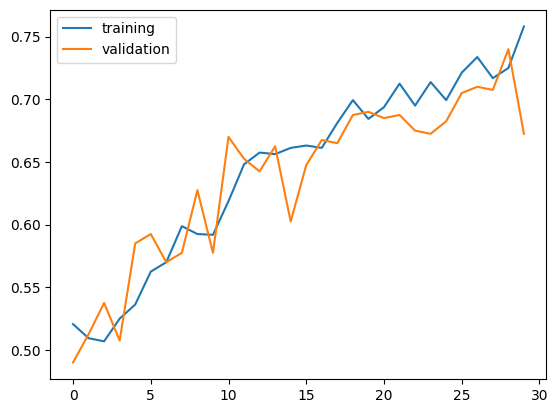

In [26]:
history3.history
plt.plot(history3.history['accuracy'], label='training')
plt.plot(history3.history['val_accuracy'], label='validation')
plt.legend(['training', 'validation'])
plt.show()

In [27]:
from tensorflow.keras.models import load_model

# Load the best saved model
best_model = load_model('best_model.h5')
# Evaluate the model on the test data
test_loss, test_accuracy = best_model.evaluate(x_test, y_test)

# Print the evaluation results
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')


13/13 [==============================] - 7s 525ms/step - loss: 0.5137 - accuracy: 0.7325
Test Loss: 0.513670027256012
Test Accuracy: 0.7325000166893005


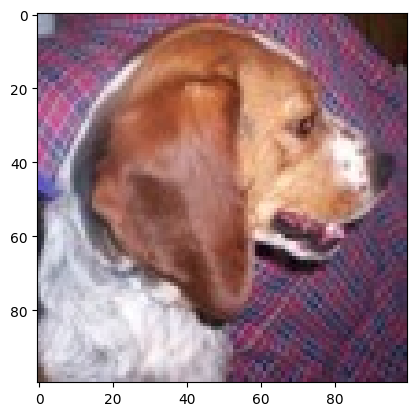

1/1 [==============================] - 0s 90ms/step
Our model predicts the image is a dog


In [34]:

idx2 = random.randint(0, len(x_test) - 1)


plt.imshow(x_test[idx2])
plt.show()


best_model = load_model('best_model3.h5')

y_pred = best_model.predict(x_test[idx2].reshape(1, 100, 100, 3))


y_pred = y_pred > 0.5


if y_pred == 0:
    pred = 'dog'
else:
    pred = 'cat'

print('Our model predicts the image is a', pred)
